#### Tweet Analysis

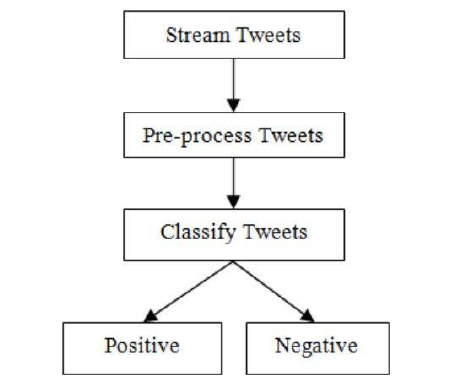

In [1]:
# Loading necessary modules
import pandas as pd              # data processing; csv file i/o (pd.read_csv)
import numpy as np               # linear algebra
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('C:/Users/sande/Minor Project/Dataset/Twitter_Suicide_Data_new.csv')
df_without_preprocess = pd.read_csv('C:/Users/sande/Minor Project/Dataset/Twitter_Suicide_Data_new.csv')

In [3]:
# Dimensions of dataset
df.shape

(303, 3)

In [4]:
# A Look at the Dataset : First 5 rows ; Last 5 rows
df.head()

,Id,Content,Sentiment
0,49640624.0,The end.,Negative
1,43505275.0,GOD OVER EVERYTHING.,Negative
2,43505275.0,I'm sorry.,Negative
3,43505275.0,God... please forgive me.,Negative
4,43505275.0,This day couldn't get any worse...,Negative


In [5]:
df.tail()

,Id,Content,Sentiment
298,9.334512e+17,"endless pain in life,end it",Negative
299,9.368911e+17,lets ave a lot of fun,Positive
300,9.123422e+17,"Nothing left in this world for me,i want to die",Negative
301,9.368912e+17,I am successful in life,Positive
302,9.368912e+17,End my life,Negative


In [6]:
# Data types
df.dtypes

Id           float64
Content       object
Sentiment     object
dtype: object

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 3 columns):
Id           303 non-null float64
Content      303 non-null object
Sentiment    303 non-null object
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()        # no. of missing values in each column ; no missing value found

Id           0
Content      0
Sentiment    0
dtype: int64

## Preprocess Tweets

### Before we start building the analyzer, we first need to remove noise and preprocess tweets by using the following steps:

* Lower Case - Convert the tweets to lower case.
* URLs - Eliminate all of these URLs via regular expression matching or replace with generic word URL.
* @username - Remove "@username" via regex matching or replace it with generic word AT_USER.
* #hashtag - replace hashtags with the exact same word without the hash (hash tags may provide some useful information), e.g. #boycottUnitedAirlines replaced with ' boycottUnitedAirlines '.
* Punctuations and additional white spaces - remove punctuation at the start and ending of the tweets, e.g: ' the day is beautiful! ' replaced with 'the day is beautiful'. We also replace multiple whitespaces with a single whitespace.

In [9]:
###Preprocess tweets
def processTweet2(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    tweet.lower()
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
    #trim
    tweet = tweet.strip('\'"')
    re.sub('[^A-Za-z0-9]+', '', tweet)
    replaceTwoOrMore(tweet)
    return tweet    

###get stopword list
def getStopWordList(stopWordListFileName):
    #read the stopwords file and build a list
    stopWords = []
    stopWords.append('at_user')
    stopWords.append('url')

    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords



def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

In [10]:
stopWords = []

st = open('stopwords.txt', 'r')
stopWords = getStopWordList('stopwords.txt')
stopWords

['at_user',
 'url',
 'a',
 'at_user',
 'rt',
 'am',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',


In [11]:
import re
import csv

In [12]:
for i in range(1,303):
    tweet=df.iloc[i,1]
    df.iloc[i,1]=processTweet2(tweet)

In [13]:
df.head()

,Id,Content,Sentiment
0,49640624.0,The end.,Negative
1,43505275.0,god over everything,Negative
2,43505275.0,i m sorry,Negative
3,43505275.0,god please forgive me,Negative
4,43505275.0,this day couldn t get any worse,Negative


In [14]:
def getFeatureVector(tweet):
    features = []

    words = tweet.split()
    for w in words:

        w = replaceTwoOrMore(w)

        #strip digits
        w = w.strip('0123456789')

        #strip punctuation
        w = w.strip('\'"!?,.')

        if (w == ""):
            continue
        elif(w in stopWords):
            #print w
            continue
        else:
            features.append(w.lower())

    return features
#end

In [15]:
for i in range(0,303):
    tweet=df.iloc[i,1]
    a=getFeatureVector(tweet)
    df.iloc[i,1] = " ".join(a)
    print(a)
    

['the', 'end']
['god']
['sorry']
['god', 'please', 'forgive']
['day', 'couldn', 'worse']
['delete', 'twitter']
['at_user', 'depression', 'die']
['at_user', 'fucking', 'die', 'sometimes']
['at_user', 'die']
['at_user', 'people', 'twitter', 'tweets', 'saying', 'die', 'repeatedly', 'url']
['at_user', 'struggling', 'depression', 'mom', 'died', 'stage', 'brain', 'cancer', 'hard']
['family', 'probably']
['family']
['im', 'starting', 'family', 'ultimately', 'fuckup', 'moreharmthangood']
['url', 'jaggoff', 'performs', 'exorcisms', 'skype', 'power', 'christ', 'compels', 'at_user', 'at_user', 'at_user']
['write', 'lesson', 'plan', 'gonna', 'kill']
['at_user', 'wow', 'jaggoff', 'drink', 'budlight', 'grip', 'leave', 'parents', 'talk', 'yo', 'mama']
['at_user', 'at_user', 'judging', 'jumping', 'prone', 'techniques', 'looks', 'ied', 'height', 'jump', 'prone', 'die']
['family']
['at_user', 'indirect', 'tweets', 'cowardly', 'tweet', 'direct', 'indirect', 'indirectly', 'courageously']
['at_user', 'indi

['at_user', 'fun', 'amp', 'games', 'throwing', 'hotcheetos', 'url']
['at_user', 'at_user', 'at_user', 'fun', 'day', 'url']
['at_user', 'at_user', 'at_user', 'fun', 'url']
['at_user', 'loving', 'line', 'moment', 'bank', 'balance', 'liking', 'style', 'affordable', 'style', 'shopping']
['at_user', 'loving', 'caring', 'person']
['sbux', 'exclusively', 'playing', 'rostam', 'beck', 'loving']
['at_user', 'liked', 'ryder', 'awhile', 'amp', 'good', 'perform', 'televised', 'fight', 'loving']
['loving', 'read', 'vr', 'love']
['at_user', 'daughter', 'delighted', 'assistant', 'referee', 'hair', 'mine', 'referee']
['at_user', 'wasn', 'performance', 'delighted', 'unbeaten', 'amp', 'gk', 'world']
['at_user', 'cheers', 'wonderful', 'highlight', 'happy', 'th', 'anniversary', 'guys', 'at_user', 'celebrate_highlight']
['at_user', 'hardest', 'times', 'lead', 'moments', 'life', 'faith', 'worth', 'end']
['at_user', 'woken', 'pleased', 'won', 'good', 'match']
['at_user', 'sounds', 'pretty', 'fine', 'pleased',

In [16]:
df.head()

,Id,Content,Sentiment
0,49640624.0,the end,Negative
1,43505275.0,god,Negative
2,43505275.0,sorry,Negative
3,43505275.0,god please forgive,Negative
4,43505275.0,day couldn worse,Negative


In [17]:
stopWords

['at_user',
 'url',
 'a',
 'at_user',
 'rt',
 'am',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',


In [18]:
tweets = []
featureList = []
for i in range(0,303):
    sentiment = df['Sentiment'][i]
    tweet = df['Content'][i]
    processedTweet = processTweet2(tweet)
    featureVector = getFeatureVector(processedTweet)
    featureList.extend(featureVector)
    tweets.append((featureVector, sentiment))


In [19]:
def extract_features1(tweet):
    processedTweet = processTweet2(tweet)
    featureVector = getFeatureVector(processedTweet)
    print(featureVector)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in featureVector)
    return features

In [20]:
def extract_features(tweet):
    tweet_words = set(tweet)
    print(tweet_words)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features

In [21]:
featureList

['end',
 'god',
 'sorry',
 'god',
 'please',
 'forgive',
 'day',
 'couldn',
 'worse',
 'delete',
 'twitter',
 'depression',
 'die',
 'fucking',
 'die',
 'sometimes',
 'die',
 'people',
 'twitter',
 'tweets',
 'saying',
 'die',
 'repeatedly',
 'struggling',
 'depression',
 'mom',
 'died',
 'stage',
 'brain',
 'cancer',
 'hard',
 'family',
 'probably',
 'family',
 'im',
 'starting',
 'family',
 'ultimately',
 'fuckup',
 'moreharmthangood',
 'jaggoff',
 'performs',
 'exorcisms',
 'skype',
 'power',
 'christ',
 'compels',
 'write',
 'lesson',
 'plan',
 'gonna',
 'kill',
 'wow',
 'jaggoff',
 'drink',
 'budlight',
 'grip',
 'leave',
 'parents',
 'talk',
 'yo',
 'mama',
 'judging',
 'jumping',
 'prone',
 'techniques',
 'looks',
 'ied',
 'height',
 'jump',
 'prone',
 'die',
 'family',
 'indirect',
 'tweets',
 'cowardly',
 'tweet',
 'direct',
 'indirect',
 'indirectly',
 'courageously',
 'indirect',
 'tweets',
 'cowardly',
 'tweet',
 'direct',
 'indirect',
 'indirectly',
 'courageously',
 'some

In [22]:
fe=extract_features1("love india")
fe

['love', 'india']


{'contains(acceptance)': False,
 'contains(according)': False,
 'contains(accounts)': False,
 'contains(achieve)': False,
 'contains(action)': False,
 'contains(active)': False,
 'contains(actor)': False,
 'contains(advance)': False,
 'contains(affordable)': False,
 'contains(age)': False,
 'contains(agency)': False,
 'contains(ahead)': False,
 'contains(ain)': False,
 'contains(aint)': False,
 'contains(allahswt)': False,
 'contains(allegiant)': False,
 'contains(alternative)': False,
 'contains(amazing)': False,
 'contains(amount)': False,
 'contains(amp)': False,
 'contains(anger)': False,
 'contains(angry)': False,
 'contains(anirudh)': False,
 'contains(anniversary)': False,
 'contains(announce)': False,
 'contains(annoyed)': False,
 'contains(answer)': False,
 'contains(anxiety)': False,
 'contains(anxious)': False,
 'contains(anymore)': False,
 'contains(anytime)': False,
 'contains(anyway)': False,
 'contains(anyways)': False,
 'contains(apart)': False,
 'contains(apartment)': 

In [23]:
import nltk
training_set = nltk.classify.util.apply_features(extract_features, tweets)
# Train the classifier Naive Bayes Classifier
NBClassifier = nltk.NaiveBayesClassifier.train(training_set)


{'end'}
{'god'}
{'sorry'}
{'forgive', 'god', 'please'}
{'day', 'couldn', 'worse'}
{'delete', 'twitter'}
{'die', 'depression'}
{'die', 'sometimes', 'fucking'}
{'die'}
{'people', 'twitter', 'saying', 'die', 'tweets', 'repeatedly'}
{'mom', 'cancer', 'brain', 'died', 'struggling', 'hard', 'stage', 'depression'}
{'family', 'probably'}
{'family'}
{'im', 'starting', 'moreharmthangood', 'family', 'fuckup', 'ultimately'}
{'exorcisms', 'power', 'jaggoff', 'compels', 'performs', 'skype', 'christ'}
{'gonna', 'kill', 'lesson', 'write', 'plan'}
{'budlight', 'leave', 'drink', 'jaggoff', 'mama', 'talk', 'wow', 'parents', 'grip', 'yo'}
{'looks', 'prone', 'ied', 'jump', 'jumping', 'height', 'judging', 'die', 'techniques'}
{'family'}
{'tweet', 'indirectly', 'courageously', 'cowardly', 'direct', 'indirect', 'tweets'}
{'tweet', 'indirectly', 'courageously', 'cowardly', 'direct', 'indirect', 'tweets'}
{'sometimes', 'ifeel', 'family'}
{'suicide', 'school', 'joke', 'indirect', 'depression'}
{'indirect', 'suic

{'loss', 'enthusiasm', 'success', 'churchill', 'winston', 'consists', 'persistence', 'failure', 'quote'}
{'positive', 'good', 'amp', 'palestinians', 'fun', 'dancing', 'love', 'viral', 'deserve', 'stories'}
{'throwing', 'games', 'amp', 'fun', 'hotcheetos'}
{'day', 'fun'}
{'fun'}
{'loving', 'liking', 'style', 'shopping', 'affordable', 'line', 'bank', 'moment', 'balance'}
{'caring', 'loving', 'person'}
{'rostam', 'sbux', 'loving', 'playing', 'beck', 'exclusively'}
{'good', 'loving', 'perform', 'awhile', 'amp', 'ryder', 'liked', 'fight', 'televised'}
{'love', 'read', 'loving', 'vr'}
{'delighted', 'hair', 'assistant', 'daughter', 'referee', 'mine'}
{'performance', 'amp', 'world', 'delighted', 'wasn', 'unbeaten', 'gk'}
{'guys', 'cheers', 'celebrate_highlight', 'anniversary', 'th', 'wonderful', 'happy', 'highlight'}
{'end', 'lead', 'moments', 'times', 'hardest', 'life', 'faith', 'worth'}
{'good', 'won', 'pleased', 'woken', 'match'}
{'sounds', 'fine', 'hear', 'tea', 'pretty', 'creepy', 'please

In [24]:
training_set

{'end'}
{'god'}
{'sorry'}


[({'contains(end)': True, 'contains(god)': False, 'contains(sorry)': False, 'contains(please)': False, 'contains(forgive)': False, 'contains(day)': False, 'contains(couldn)': False, 'contains(worse)': False, 'contains(delete)': False, 'contains(twitter)': False, 'contains(depression)': False, 'contains(die)': False, 'contains(fucking)': False, 'contains(sometimes)': False, 'contains(people)': False, 'contains(tweets)': False, 'contains(saying)': False, 'contains(repeatedly)': False, 'contains(struggling)': False, 'contains(mom)': False, 'contains(died)': False, 'contains(stage)': False, 'contains(brain)': False, 'contains(cancer)': False, 'contains(hard)': False, 'contains(family)': False, 'contains(probably)': False, 'contains(im)': False, 'contains(starting)': False, 'contains(ultimately)': False, 'contains(fuckup)': False, 'contains(moreharmthangood)': False, 'contains(jaggoff)': False, 'contains(performs)': False, 'contains(exorcisms)': False, 'contains(skype)': False, 'contains(po

In [25]:

NBClassifier.show_most_informative_features()

Most Informative Features
          contains(kill) = True           Negati : Positi =     10.5 : 1.0
           contains(die) = True           Negati : Positi =     10.5 : 1.0
           contains(joy) = True           Positi : Negati =      8.6 : 1.0
          contains(good) = True           Positi : Negati =      6.3 : 1.0
          contains(live) = True           Positi : Negati =      5.9 : 1.0
      contains(thinking) = True           Positi : Negati =      5.0 : 1.0
       contains(suicide) = True           Negati : Positi =      4.2 : 1.0
         contains(ahead) = True           Positi : Negati =      4.1 : 1.0
         contains(heart) = True           Positi : Negati =      4.1 : 1.0
          contains(move) = True           Positi : Negati =      3.2 : 1.0


In [26]:
NBClassifier.classify(extract_features1("I want to die"))

['die']


'Negative'

In [27]:
 sorted(NBClassifier.labels())

['Negative', 'Positive']

In [28]:
NBClassifier.prob_classify(extract_features("I love you"))

{'o', 'I', 'v', 'y', 'l', 'u', ' ', 'e'}


<ProbDist with 2 samples>

In [29]:
extract_features("love")

{'o', 'l', 'e', 'v'}


{'contains(acceptance)': False,
 'contains(according)': False,
 'contains(accounts)': False,
 'contains(achieve)': False,
 'contains(action)': False,
 'contains(active)': False,
 'contains(actor)': False,
 'contains(advance)': False,
 'contains(affordable)': False,
 'contains(age)': False,
 'contains(agency)': False,
 'contains(ahead)': False,
 'contains(ain)': False,
 'contains(aint)': False,
 'contains(allahswt)': False,
 'contains(allegiant)': False,
 'contains(alternative)': False,
 'contains(amazing)': False,
 'contains(amount)': False,
 'contains(amp)': False,
 'contains(anger)': False,
 'contains(angry)': False,
 'contains(anirudh)': False,
 'contains(anniversary)': False,
 'contains(announce)': False,
 'contains(annoyed)': False,
 'contains(answer)': False,
 'contains(anxiety)': False,
 'contains(anxious)': False,
 'contains(anymore)': False,
 'contains(anytime)': False,
 'contains(anyway)': False,
 'contains(anyways)': False,
 'contains(apart)': False,
 'contains(apartment)': 

In [30]:
test=[extract_features1("sorry"),extract_features1("i can do anythong")]
for pdist in NBClassifier.prob_classify_many(test):
    print('%.4f %.4f' % (pdist.prob('Positive'), pdist.prob('Negative')))

['sorry']
['anythong']
0.0024 0.9976
0.0444 0.9556


In [31]:
extract_features1("be yourself")

['yourself']


{'contains(acceptance)': False,
 'contains(according)': False,
 'contains(accounts)': False,
 'contains(achieve)': False,
 'contains(action)': False,
 'contains(active)': False,
 'contains(actor)': False,
 'contains(advance)': False,
 'contains(affordable)': False,
 'contains(age)': False,
 'contains(agency)': False,
 'contains(ahead)': False,
 'contains(ain)': False,
 'contains(aint)': False,
 'contains(allahswt)': False,
 'contains(allegiant)': False,
 'contains(alternative)': False,
 'contains(amazing)': False,
 'contains(amount)': False,
 'contains(amp)': False,
 'contains(anger)': False,
 'contains(angry)': False,
 'contains(anirudh)': False,
 'contains(anniversary)': False,
 'contains(announce)': False,
 'contains(annoyed)': False,
 'contains(answer)': False,
 'contains(anxiety)': False,
 'contains(anxious)': False,
 'contains(anymore)': False,
 'contains(anytime)': False,
 'contains(anyway)': False,
 'contains(anyways)': False,
 'contains(apart)': False,
 'contains(apartment)': 

In [32]:
NBClassifier.classify(extract_features1("i love"))

['love']


'Positive'

In [33]:
# examine the shape
df.shape

(303, 3)

In [34]:
# examine the class distribution
df.Sentiment.value_counts()

Negative    175
Positive    128
Name: Sentiment, dtype: int64

In [35]:
# convert label to a numerical variable
df['Sentiment_num'] = df.Sentiment.map({'Negative':0, 'Positive':1})

In [36]:
# check that the conversion worked
df.head(10)

,Id,Content,Sentiment,Sentiment_num
0,4.964062e+07,the end,Negative,0
1,4.350528e+07,god,Negative,0
2,4.350528e+07,sorry,Negative,0
3,4.350528e+07,god please forgive,Negative,0
4,4.350528e+07,day couldn worse,Negative,0
5,4.350528e+07,delete twitter,Negative,0
6,9.194280e+17,at_user depression die,Negative,0
7,9.194280e+17,at_user fucking die sometimes,Negative,0
8,9.194280e+17,at_user die,Negative,0
9,9.194280e+17,at_user people twitter tweets saying die repea...,Negative,0


In [37]:
# how to define X and y (from the Suicide data) for use with COUNTVECTORIZER
X = df.Content
y = df.Sentiment_num
print(X.shape)
print(y.shape)

(303,)
(303,)


In [38]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227,)
(76,)
(227,)
(76,)


C:\Users\sande\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
# instantiate the vectorizer
vect = CountVectorizer()

In [41]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [42]:
# examine the document-term matrix
X_train_dtm

<227x612 sparse matrix of type '<class 'numpy.int64'>'
	with 1154 stored elements in Compressed Sparse Row format>

In [43]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<76x612 sparse matrix of type '<class 'numpy.int64'>'
	with 230 stored elements in Compressed Sparse Row format>

In [44]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [45]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 13.1 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [47]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.96052631578947367

In [48]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[39,  1],
       [ 2, 34]])

In [49]:
X_test[(y_pred_class==1)&(y_test==0)] #print tweet for false positive

193    god loosing people life everyday move ahead life
Name: Content, dtype: object

In [50]:

# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([  1.96850458e-02,   7.40242606e-01,   7.27734193e-02,
         8.62577547e-01,   6.81255551e-01,   8.83389742e-01,
         2.62689090e-01,   9.60793582e-01,   9.78889865e-01,
         9.72258337e-01,   1.43672118e-01,   4.05286344e-01,
         7.27734193e-02,   4.54715067e-01,   9.99698020e-01,
         4.57689844e-01,   1.00985974e-01,   7.27734193e-02,
         6.25400949e-02,   3.28769008e-01,   3.16208149e-02,
         2.74310311e-02,   8.92200250e-02,   9.99098919e-01,
         8.49989010e-01,   9.26735156e-01,   9.74916537e-01,
         1.40351908e-01,   6.25400949e-02,   9.99845190e-01,
         6.63138990e-01,   6.25400949e-02,   1.75718649e-03,
         1.31438322e-02,   8.73174399e-01,   1.11682864e-01,
         9.89002724e-01,   8.37758012e-01,   7.23165552e-01,
         4.48973318e-02,   3.95063770e-01,   5.89639218e-01,
         9.99993517e-01,   7.13495069e-02,   7.27734193e-02,
         8.48010585e-01,   7.13495069e-02,   4.54715067e-01,
         9.99964060e-01,

In [51]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.96111111111111103

In [52]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 17.1 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [55]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([ 0.12183465,  0.53164269,  0.09001892,  0.64484956,  0.43301695,
        0.6411681 ,  0.40963897,  0.70707041,  0.82711524,  0.573003  ,
        0.66311551,  0.20939722,  0.08034894,  0.2624099 ,  0.88414708,
        0.34371367,  0.22274234,  0.09001892,  0.09220384,  0.20081345,
        0.08311986,  0.06984079,  0.11346157,  0.88919507,  0.77623453,
        0.88417183,  0.79242627,  0.17921193,  0.09220384,  0.97806335,
        0.70691499,  0.09220384,  0.14347317,  0.1141328 ,  0.70686646,
        0.16734048,  0.84187098,  0.61313318,  0.23526815,  0.0932652 ,
        0.21124028,  0.42578957,  0.98991968,  0.09708871,  0.09001892,
        0.58727923,  0.07935711,  0.2624099 ,  0.9871123 ,  0.85491809,
        0.155551  ,  0.46132729,  0.31528443,  0.35596328,  0.27163215,
        0.27488579,  0.157586  ,  0.59019907,  0.20939722,  0.52233137,
        0.87840425,  0.01458249,  0.96138932,  0.69576021,  0.3237094 ,
        0.54030749,  0.17073705,  0.98659751,  0.77623453,  0.81

In [56]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.88157894736842102

In [57]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.94097222222222221

In [58]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

612

In [59]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['acceptance', 'according', 'accounts', 'action', 'active', 'advance', 'affordable', 'agency', 'ahead', 'ain', 'allahswt', 'allegiant', 'alternative', 'amazing', 'amp', 'anger', 'angry', 'anirudh', 'annoyed', 'answer', 'anxiety', 'anxious', 'anymore', 'anytime', 'anyways', 'apart', 'apartment', 'apjabdulkalam', 'appreciate', 'armys', 'artist', 'asia', 'asiacup', 'assistant', 'at_user', 'attack', 'auspicious', 'awhile', 'awkward', 'baby', 'bad', 'badday', 'baha', 'balance', 'bank', 'bapuji', 'bc', 'beat', 'beating', 'beautiful']


In [60]:

# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[  1.,   1.,   1., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   1.,   1.]])

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dtm, y_train)
y_pred = knn.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred))

0.697368421053


In [63]:
from sklearn.cross_validation import cross_val_score

In [64]:
vect.fit(X)
X_dtm = vect.transform(X)

In [65]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
print(scores)

[ 0.74193548  0.80645161  0.70967742  0.64516129  0.74193548  0.63333333
  0.63333333  0.9         0.89655172  0.82758621]


In [66]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.753596588802


In [67]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7492584352984798, 0.70122358175750832, 0.72723767148683716, 0.73424175009269566, 0.75359658880237301, 0.68363737486095666, 0.71689284390063035, 0.67028921023359289, 0.68018168335187246, 0.67340007415647007, 0.68006674082313678, 0.65672599184278824, 0.6599517982944012, 0.65672599184278824, 0.66016685205784209, 0.64059695958472374, 0.65371523915461627, 0.62747126436781608, 0.63736373748609565, 0.63424545791620324, 0.63747126436781598, 0.62424545791620323, 0.63080459770114938, 0.62079718205413426, 0.62402298850574711, 0.62079718205413426, 0.62724879495736008, 0.60724879495735995, 0.61047460140897292, 0.60714126807563962]


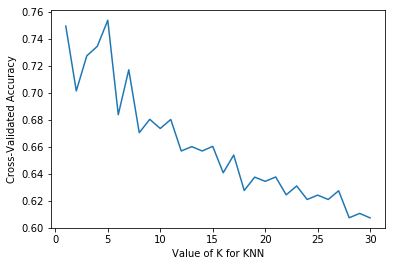

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X_dtm, y, cv=10, scoring='accuracy').mean())

0.822858731924


In [70]:
# More efficient parameter tuning using GridSearchCV

from sklearn.grid_search import GridSearchCV

C:\Users\sande\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [71]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [72]:

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [73]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [74]:
# fit the grid with data
grid.fit(X_dtm, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [75]:

# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.74917, std: 0.07634, params: {'n_neighbors': 1},
 mean: 0.69967, std: 0.10074, params: {'n_neighbors': 2},
 mean: 0.72607, std: 0.09114, params: {'n_neighbors': 3},
 mean: 0.73267, std: 0.11460, params: {'n_neighbors': 4},
 mean: 0.75248, std: 0.09645, params: {'n_neighbors': 5},
 mean: 0.68317, std: 0.09333, params: {'n_neighbors': 6},
 mean: 0.71617, std: 0.07639, params: {'n_neighbors': 7},
 mean: 0.66997, std: 0.07781, params: {'n_neighbors': 8},
 mean: 0.67987, std: 0.08589, params: {'n_neighbors': 9},
 mean: 0.67327, std: 0.08476, params: {'n_neighbors': 10},
 mean: 0.67987, std: 0.08127, params: {'n_neighbors': 11},
 mean: 0.65677, std: 0.06803, params: {'n_neighbors': 12},
 mean: 0.66007, std: 0.06817, params: {'n_neighbors': 13},
 mean: 0.65677, std: 0.06648, params: {'n_neighbors': 14},
 mean: 0.66007, std: 0.07635, params: {'n_neighbors': 15},
 mean: 0.64026, std: 0.06809, params: {'n_neighbors': 16},
 mean: 0.65347, std: 0.07734, params: {'n_neighbors': 17},
 mean:

In [76]:

# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 0.77419355  0.87096774  0.70967742  0.67741935  0.74193548  0.63333333
  0.66666667  0.86666667  0.75862069  0.79310345]
0.7491749174917491


In [77]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.7491749174917491, 0.6996699669966997, 0.7260726072607261, 0.7326732673267327, 0.7524752475247525, 0.6831683168316832, 0.7161716171617162, 0.66996699669967, 0.6798679867986799, 0.6732673267326733, 0.6798679867986799, 0.6567656765676567, 0.6600660066006601, 0.6567656765676567, 0.6600660066006601, 0.6402640264026402, 0.6534653465346535, 0.6270627062706271, 0.636963696369637, 0.6336633663366337, 0.636963696369637, 0.6237623762376238, 0.6303630363036303, 0.6204620462046204, 0.6237623762376238, 0.6204620462046204, 0.6270627062706271, 0.6072607260726073, 0.6105610561056105, 0.6072607260726073]


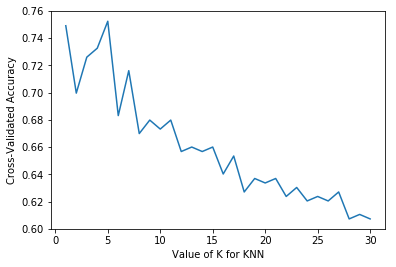

In [78]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [79]:
# convert label to a numerical variable
df_without_preprocess['Sentiment_num'] = df_without_preprocess.Sentiment.map({'Negative':0, 'Positive':1})

In [80]:
# how to define X and y (from the Suicide data) for use with COUNTVECTORIZER
X = df_without_preprocess.Content
y = df_without_preprocess.Sentiment_num
print(X.shape)
print(y.shape)

(303,)
(303,)


In [81]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227,)
(76,)
(227,)
(76,)


In [82]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
# instantiate the vectorizer
vect = CountVectorizer()

In [84]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [85]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)

In [86]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [87]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 13 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [88]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [89]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.93421052631578949

In [90]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[37,  3],
       [ 2, 34]])

In [91]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [92]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 12 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [94]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.86842105263157898

In [95]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dtm, y_train)
y_pred = knn.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred))

0.605263157895


In [96]:
vect.fit(X)
X_dtm = vect.transform(X)

In [97]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_dtm, y, cv=10, scoring='accuracy')
print(scores)

[ 0.67741935  0.70967742  0.61290323  0.61290323  0.58064516  0.7
  0.63333333  0.86666667  0.5862069   0.72413793]


In [98]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.670389321468


### Accuracy %
### classifier                      before        after
#### knn                            67 %            76 %         
#### logistic regression            86 %            88 %
#### Naive Bayes                    93 %            96 %